In [1]:
import mediapipe as mp
import cv2
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Drawing helpers
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

objc[76505]: Class CaptureDelegate is implemented in both /Users/fuixlabsdev1/Programming/PP/graduation-thesis/env/lib/python3.8/site-packages/mediapipe/.dylibs/libopencv_videoio.3.4.16.dylib (0x1161c8860) and /Users/fuixlabsdev1/Programming/PP/graduation-thesis/env/lib/python3.8/site-packages/cv2/cv2.abi3.so (0x15eece480). One of the two will be used. Which one is undefined.
objc[76505]: Class CVWindow is implemented in both /Users/fuixlabsdev1/Programming/PP/graduation-thesis/env/lib/python3.8/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x107150a68) and /Users/fuixlabsdev1/Programming/PP/graduation-thesis/env/lib/python3.8/site-packages/cv2/cv2.abi3.so (0x15eece4d0). One of the two will be used. Which one is undefined.
objc[76505]: Class CVView is implemented in both /Users/fuixlabsdev1/Programming/PP/graduation-thesis/env/lib/python3.8/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x107150a90) and /Users/fuixlabsdev1/Programming/PP/graduation-th

### 1. Train Model

#### 1.1. Describe data and split dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [3]:
def rescale_frame(frame, percent=50):
    '''
    Rescale a frame to a certain percentage compare to its original frame
    '''
    width = int(frame.shape[1] * percent/ 100)
    height = int(frame.shape[0] * percent/ 100)
    dim = (width, height)
    return cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)


def describe_dataset(dataset_path: str):
    '''
    Describe dataset
    '''

    data = pd.read_csv(dataset_path)
    print(f"Headers: {list(data.columns.values)}")
    print(f'Number of rows: {data.shape[0]} \nNumber of columns: {data.shape[1]}\n')
    print(f"Labels: \n{data['label'].value_counts()}\n")
    print(f"Missing values: {data.isnull().values.any()}\n")
    
    duplicate = data[data.duplicated()]
    print(f"Duplicate Rows : {len(duplicate.sum(axis=1))}")

    return data

In [4]:
df = describe_dataset("./dataset.csv")

df.head(5)

Headers: ['label', 'nose_x', 'nose_y', 'nose_z', 'nose_v', 'left_shoulder_x', 'left_shoulder_y', 'left_shoulder_z', 'left_shoulder_v', 'right_shoulder_x', 'right_shoulder_y', 'right_shoulder_z', 'right_shoulder_v', 'left_elbow_x', 'left_elbow_y', 'left_elbow_z', 'left_elbow_v', 'right_elbow_x', 'right_elbow_y', 'right_elbow_z', 'right_elbow_v', 'left_wrist_x', 'left_wrist_y', 'left_wrist_z', 'left_wrist_v', 'right_wrist_x', 'right_wrist_y', 'right_wrist_z', 'right_wrist_v', 'left_hip_x', 'left_hip_y', 'left_hip_z', 'left_hip_v', 'right_hip_x', 'right_hip_y', 'right_hip_z', 'right_hip_v', 'left_knee_x', 'left_knee_y', 'left_knee_z', 'left_knee_v', 'right_knee_x', 'right_knee_y', 'right_knee_z', 'right_knee_v', 'left_ankle_x', 'left_ankle_y', 'left_ankle_z', 'left_ankle_v', 'right_ankle_x', 'right_ankle_y', 'right_ankle_z', 'right_ankle_v', 'left_heel_x', 'left_heel_y', 'left_heel_z', 'left_heel_v', 'right_heel_x', 'right_heel_y', 'right_heel_z', 'right_heel_v', 'left_foot_index_x', 'lef

,label,nose_x,nose_y,nose_z,nose_v,left_shoulder_x,left_shoulder_y,left_shoulder_z,left_shoulder_v,right_shoulder_x,...,right_heel_z,right_heel_v,left_foot_index_x,left_foot_index_y,left_foot_index_z,left_foot_index_v,right_foot_index_x,right_foot_index_y,right_foot_index_z,right_foot_index_v
0,C,0.792141,0.585212,-0.067640,0.999518,0.682632,0.539670,0.270455,0.996880,0.688922,...,-0.077094,0.957863,0.098083,0.716431,0.186286,0.685353,0.084355,0.724885,-0.230562,0.952622
1,C,0.792153,0.585208,-0.067657,0.999518,0.682624,0.539675,0.270204,0.996868,0.688926,...,-0.075767,0.958398,0.098175,0.716389,0.188317,0.685743,0.084443,0.724854,-0.228939,0.952915
2,C,0.792160,0.585211,-0.067602,0.999519,0.682617,0.539684,0.270091,0.996864,0.688927,...,-0.075364,0.958592,0.098203,0.716382,0.188618,0.686022,0.084499,0.724839,-0.228520,0.952998
3,C,0.792171,0.585225,-0.067480,0.999520,0.682611,0.539690,0.270020,0.996866,0.688929,...,-0.074546,0.958883,0.098239,0.716374,0.190058,0.686536,0.084533,0.724826,-0.227477,0.953112
4,C,0.792179,0.585240,-0.067460,0.999522,0.682607,0.539697,0.269914,0.996867,0.688932,...,-0.074029,0.959184,0.098282,0.716365,0.191131,0.686611,0.084556,0.724814,-0.226812,0.953242


In [11]:
t = df[['nose_x', 'nose_y', 'nose_z', 'nose_v', 'left_shoulder_x', 'left_shoulder_y', 'left_shoulder_z', 'left_shoulder_v', 'right_shoulder_x', 'right_shoulder_y', 'right_shoulder_z', 'right_shoulder_v', 'left_elbow_x', 'left_elbow_y', 'left_elbow_z', 'left_elbow_v', 'right_elbow_x', 'right_elbow_y', 'right_elbow_z', 'right_elbow_v', 'left_wrist_x', 'left_wrist_y', 'left_wrist_z', 'left_wrist_v', 'right_wrist_x', 'right_wrist_y', 'right_wrist_z', 'right_wrist_v', 'left_hip_x', 'left_hip_y', 'left_hip_z', 'left_hip_v', 'right_hip_x', 'right_hip_y', 'right_hip_z', 'right_hip_v', 'left_knee_x', 'left_knee_y', 'left_knee_z', 'left_knee_v', 'right_knee_x', 'right_knee_y', 'right_knee_z', 'right_knee_v', 'left_ankle_x', 'left_ankle_y', 'left_ankle_z', 'left_ankle_v', 'right_ankle_x', 'right_ankle_y', 'right_ankle_z', 'right_ankle_v', 'left_heel_x', 'left_heel_y', 'left_heel_z', 'left_heel_v', 'right_heel_x', 'right_heel_y', 'right_heel_z', 'right_heel_v', 'left_foot_index_x', 'left_foot_index_y', 'left_foot_index_z', 'left_foot_index_v', 'right_foot_index_x', 'right_foot_index_y', 'right_foot_index_z', 'right_foot_index_v']].apply(lambda x: pd.Series.round(x, 2))
t.to_csv("round.csv")

<AxesSubplot:xlabel='count', ylabel='label'>

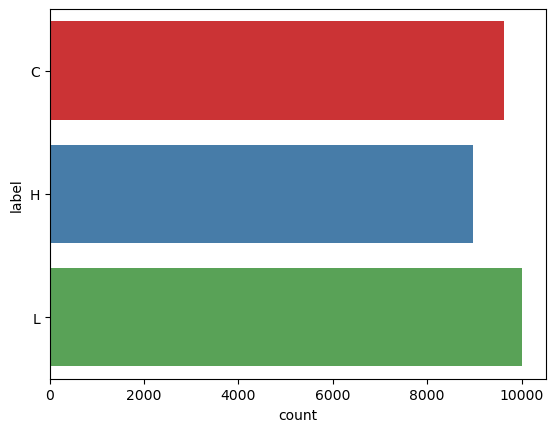

In [5]:
sns.countplot(y='label', data=df, palette="Set1") 

In [ ]:
# Extract features and class

X = df.drop("label", axis=1) # features
y = df["label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [ ]:
y_test.head(10)

#### 1.2. Train model using Scikit-Learn

In [ ]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score

In [ ]:
algorithms =[("LR", LogisticRegression()),
         ("SVC", SVC()),
         ('KNN',KNeighborsClassifier()),
         ("DTC", DecisionTreeClassifier()),
         ("SGDC", SGDClassifier()),
         ("Ridge", RidgeClassifier()),
         ('RF', RandomForestClassifier()),]

models = {}
final_results = []

for name, model in algorithms:
    trained_model = model.fit(X_train, y_train)
    models[name] = trained_model

    # Evaluate model
    model_results = model.predict(X_test)

    p_score = precision_score(y_test, model_results, average="macro")
    a_score = accuracy_score(y_test, model_results)
    f1_score_result = f1_score(y_test, model_results, average=None, labels=["C", "L", "H"])
    final_results.append(( name, p_score, a_score, f1_score_result ))


final_results.sort(key=lambda k: k[3][0] + k[3][1], reverse=True)

In [ ]:
pd.DataFrame(final_results, columns=["Model", "Precision Score", "Accuracy score" , "F1 score"])

#### 1.3. Dumped model using pickle

According to the evaluations, there are multiple good models at the moment, therefore, I will pick the Random Forrest model to use.

In [ ]:
with open("./model/RF_model.pkl", "wb") as f:
    pickle.dump(models["RF"], f)

In [ ]:
with open("./model/KNN_model.pkl", "wb") as f:
    pickle.dump(models["KNN"], f)